<a href="https://colab.research.google.com/github/MrXisOnline/MLP/blob/main/wine_quality_ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Importing

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'red-wine-quality-cortez-et-al-2009:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4458%2F8204%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240616%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240616T065054Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D54f5cfa7f2eb2c0af7e763fd3ae1670a1276309b14517542ddd1ffb95ecdf97b773f7e6b1e117be2b5eb46c3fe185cc3161c47d2151c8db39722cb57d01b6d88cfcb74cc9f240a8e99be55e77b91ffc245c22809d007816851ad5d771410c89feb5b0c7499e4147d459a1115595378dcda3c30b8780936bc46ee6179a9c365b68c0089414974228dec3f4426940317a2837fc9ae83cd0a49be1efb327ce531ec410174a24abb7df21e1eb6434c1b4ce303b5e05c7143d0955c77e796bf0e3c23a9f7a9744c6c7a8222dd1e1c3a18787882aca82ed48ba373082fda6d729d3e4f9344006a2dad7667b17b5cb6d5ece24b7087e62d07ec749f5b71c47920d115a7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 26176 bytes downloaded
Downloaded and uncompressed: red-wine-quality-cortez-et-al-2009
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [3]:
df = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7


In [8]:
x_train, y_train = train[train.columns[:-1]], train["quality"]

In [9]:
x_train, y_train

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 493             8.7             0.690         0.31             3.0      0.086   
 354             6.1             0.210         0.40             1.4      0.066   
 342            10.9             0.390         0.47             1.8      0.118   
 834             8.8             0.685         0.26             1.6      0.088   
 705             8.4             1.035         0.15             6.0      0.073   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

### Data Visualization

<Axes: xlabel='fixed acidity', ylabel='density'>

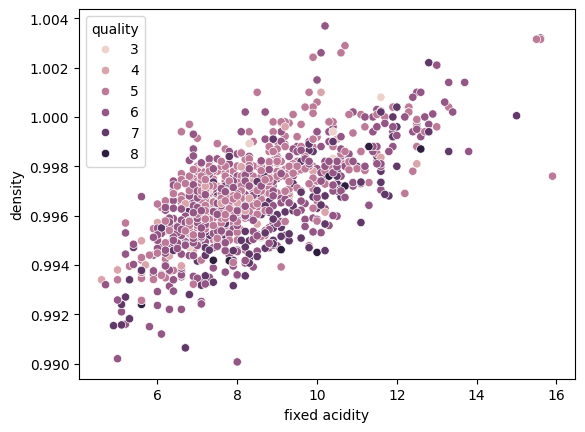

In [10]:
sns.scatterplot(data=train, x="fixed acidity", y="density", hue="quality")

<Axes: xlabel='fixed acidity', ylabel='density'>

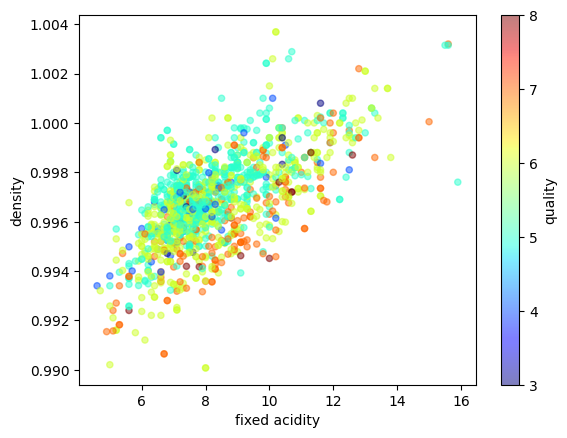

In [11]:
train.plot(kind="scatter", x="fixed acidity", y="density", alpha=0.5, c="quality",
          cmap=plt.get_cmap("jet"))

In [12]:
corr_mat = train.corr()

In [13]:
corr_mat["quality"]

fixed acidity           0.122488
volatile acidity       -0.378372
citric acid             0.216115
residual sugar          0.005425
chlorides              -0.126541
free sulfur dioxide    -0.055860
total sulfur dioxide   -0.200067
density                -0.167091
pH                     -0.045185
sulphates               0.242596
alcohol                 0.472676
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

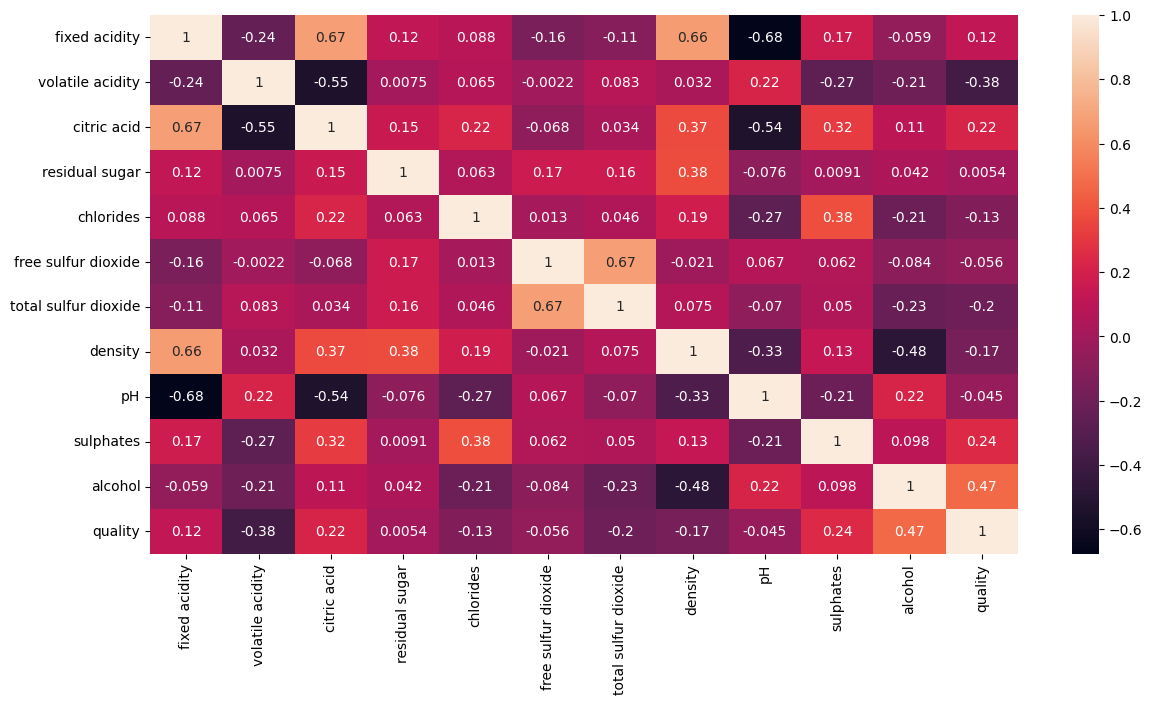

In [14]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr_mat, annot=True)

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

<Figure size 1400x700 with 0 Axes>

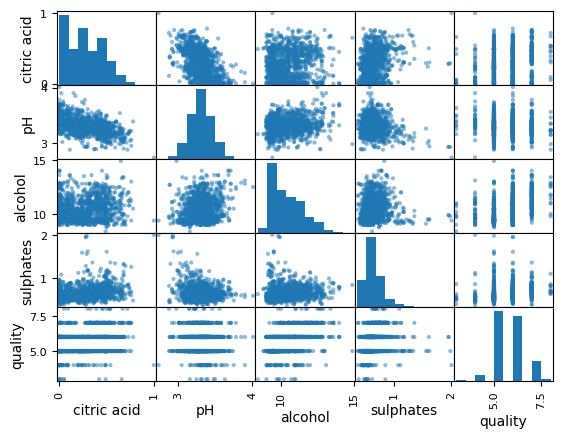

In [15]:
plt.figure(figsize=(14, 7))
pd.plotting.scatter_matrix(train[["citric acid", "pH", "alcohol", "sulphates", "quality"]])

### Data Prep

In [16]:
x_train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [17]:
# if there was missing values we will wither drop rows with missing values
# X_train.dropna()
# or give avg of columns values there
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')
# imputer.fit(X_train)
# imputer.statistics_  # to check imputer learned median
# X_train_imputed = imputer.transform(X_train)

In [18]:
# handling text and categorical attribute
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# X_encoded = ordinal_encoder.fit_transform(x_train, y_train)

In [19]:
# using one-hot encoding
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# X_encoded = cat_encoder.fit_transform(x_train, y_train)

In [22]:
# creating pipeline to apply apply tranformation on data without any mistake
# standardization is used for feature scaling
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('stad_scalar', StandardScaler()), ])
X_transformed = transform_pipeline.fit_transform(x_train)

In [21]:
# to transform column with both numerical and categorical values
# from sklearn.compose import ColumnTransformer
# num_attribs = list(x_train)
# cat_attribs = ['place_of_manufacturing']
# full_pipeline = ColumnTransformer([
#     ('num', num_pipeline, num_attribs),
#     ('cat', OneHotEncoder(), cat_attribs),
# ])
# x_transformed = full_pipeline.fit_transform(x_train)

### Training ML models

In [28]:
X_transformed.shape, y_train.array.shape

((1279, 11), (1279,))

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_transformed, y_train.array)

LinearRegression()

In [30]:
# to evaluate regression metric
from sklearn.metrics import mean_squared_error
quality_pred = lin_reg.predict(X_transformed)
mean_squared_error(y_train, quality_pred)

0.42419115731399015

In [31]:
x_test, y_test = test[test.columns[:-1]], test["quality"]
x_test_trans = transform_pipeline.fit_transform(x_test)
quality_test_pred = lin_reg.predict(x_test_trans)
mean_squared_error(y_test, quality_test_pred)

0.3907882934452552

Text(0, 0.5, 'Predicted Quality')

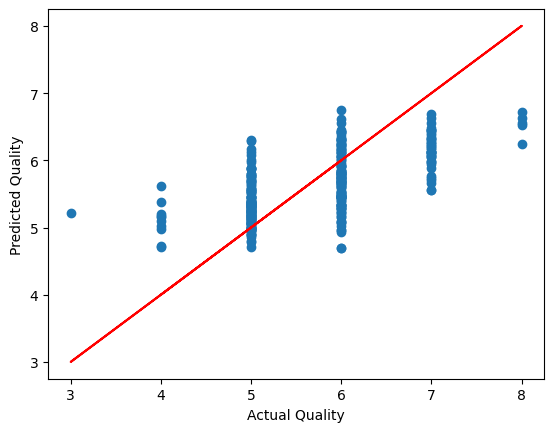

In [32]:
plt.scatter(y_test, quality_test_pred)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_transformed, y_train)

DecisionTreeRegressor()

In [34]:
from sklearn.metrics import mean_squared_error
quality_pred = tree_reg.predict(X_transformed)
mean_squared_error(y_train, quality_pred)

0.0

In [35]:
quality_test_pred = tree_reg.predict(x_test_trans)
mean_squared_error(y_test, quality_test_pred)

0.76875

Text(0, 0.5, 'Predicted Quality')

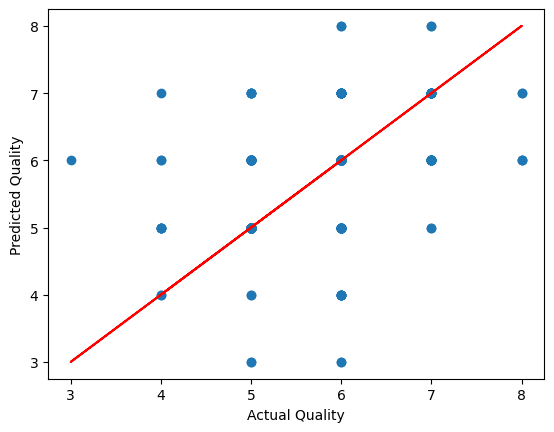

In [36]:
plt.scatter(y_test, quality_test_pred)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

In [37]:
def display_score(scores):
    print(scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_transformed, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = -scores
display_score(lin_reg_scores)

[0.39158054 0.51354046 0.47883933 0.4912904  0.46152392 0.45394686
 0.44549394 0.46091861 0.24596434 0.42026844]
Mean:  0.4363366846653879
Standard Deviation:  0.0713599197838865


In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_transformed, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_reg_scores = -scores
display_score(tree_reg_scores)

[0.6015625 0.7265625 0.703125  0.5       0.6953125 0.7578125 0.5390625
 0.6015625 0.390625  0.7007874]
Mean:  0.6216412401574802
Standard Deviation:  0.111208322417058


In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_transformed, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_transformed, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_reg_scores = -scores
display_score(forest_reg_scores)

[0.37425859 0.45086562 0.38719219 0.31789766 0.36722813 0.37209219
 0.30085469 0.45004141 0.20871094 0.32028661]
Mean:  0.3549428020423228
Standard Deviation:  0.06854616128312442


In [47]:
quality_test_pred = forest_reg.predict(x_test_trans)
mean_squared_error(y_test, quality_test_pred)

0.3454878125

Text(0, 0.5, 'Predicted Quality')

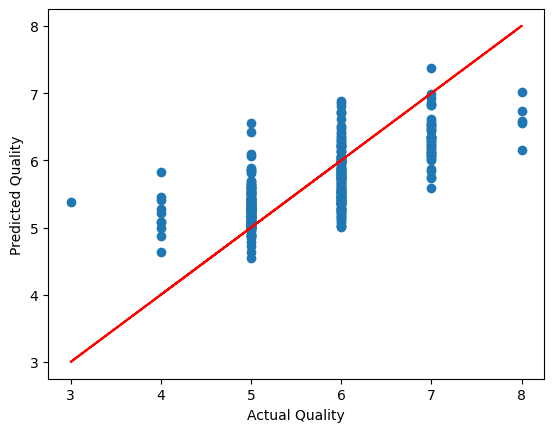

In [48]:
plt.scatter(y_test, quality_test_pred)
plt.plot(y_test, y_test, 'r-')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

### Fine-Tuning ML models

In [51]:
# for this task we can eother use GridSearch which fits a bunch of models over a range of parameter options
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
grid_search_cv = GridSearchCV(
    forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

In [52]:
grid_search_cv.fit(X_transformed, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search_cv.best_params_

{'max_features': 2, 'n_estimators': 30}

In [56]:
cvres = grid_search_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.49709388616557726 {'max_features': 2, 'n_estimators': 3}
0.40538676470588236 {'max_features': 2, 'n_estimators': 10}
0.37401353826252726 {'max_features': 2, 'n_estimators': 30}
0.4884283088235294 {'max_features': 4, 'n_estimators': 3}
0.39746200980392155 {'max_features': 4, 'n_estimators': 10}
0.3745614038671024 {'max_features': 4, 'n_estimators': 30}
0.4773842592592592 {'max_features': 6, 'n_estimators': 3}
0.40237123161764704 {'max_features': 6, 'n_estimators': 10}
0.3767099571078431 {'max_features': 6, 'n_estimators': 30}
0.4687728077342048 {'max_features': 8, 'n_estimators': 3}
0.3844132046568627 {'max_features': 8, 'n_estimators': 10}
0.38048487540849674 {'max_features': 8, 'n_estimators': 30}
0.4472327750544662 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.39961038602941173 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.46991217320261425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.39134286151960784 {'bootstrap': False, 'max_feature

In [57]:
grid_search_cv.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [ ]:
# RandomSearch is used when we have a large set of hyperparameters as the name suggest it randomly chooses the hyperparameter from the grid
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# we can use this info to drop features that are not so important to make model more faster and better
feature_importances = grid_search_cv.best_estimator_.feature_importances_
sorted(zip(feature_importances, x_train.columns.array), reverse=True)

[(0.17800475210397348, 'alcohol'),
 (0.13981920650735633, 'sulphates'),
 (0.11335433812918713, 'volatile acidity'),
 (0.0845412082849708, 'total sulfur dioxide'),
 (0.08378646437038732, 'density'),
 (0.07739294180201334, 'citric acid'),
 (0.07489815795625038, 'chlorides'),
 (0.06702968822442713, 'pH'),
 (0.06606201322176875, 'fixed acidity'),
 (0.05836162418296523, 'residual sugar'),
 (0.056749605216700146, 'free sulfur dioxide')]

In [62]:
quality_test_pred = grid_search_cv.best_estimator_.predict(x_test_trans)
mean_squared_error(y_test, quality_test_pred)

0.3481597222222222

In [65]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_pred - y_test) ** 2
stats.t.interval(confidence, len(squared_errors)-1,
                 loc=squared_errors.mean(),
                 scale=stats.sem(squared_errors))

(0.28114023982245284, 0.41517920462199154)